In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [122]:
df = pd.read_csv('country_data.csv', index_col = 'name')

In [123]:
df['life_exp'] = (df['life_expectancy_male']+df['life_expectancy_female'])/2
df['log_gdp'] = np.log10(df['gdp'])
df['log_pop'] = np.log10(df['population'])
df['sec_sch_fem'] = df['secondary_school_enrollment_female']
df.columns

Index(['gdp', 'sex_ratio', 'surface_area', 'life_expectancy_male',
       'unemployment', 'imports', 'homicide_rate', 'currency', 'iso2',
       'employment_services', 'employment_industry', 'urban_population_growth',
       'secondary_school_enrollment_female', 'employment_agriculture',
       'capital', 'forested_area', 'exports', 'life_expectancy_female',
       'post_secondary_enrollment_female', 'post_secondary_enrollment_male',
       'primary_school_enrollment_female', 'infant_mortality', 'gdp_growth',
       'threatened_species', 'population', 'urban_population',
       'secondary_school_enrollment_male', 'pop_growth', 'region',
       'pop_density', 'internet_users', 'gdp_per_capita', 'fertility',
       'refugees', 'primary_school_enrollment_male', 'co2_emissions',
       'tourists', 'life_exp', 'log_gdp', 'log_pop', 'sec_sch_fem'],
      dtype='object')

In [124]:
gdp = df['gdp'].dropna().copy()

print(gdp.mean())
print(gdp.median())
print(gdp.std())
print(ss.skew(gdp))
print(ss.kurtosis(gdp))


445130.81773399014
34426.0
1826082.24085795
8.670139147794638
84.29446090368722


In [125]:
loggdp = df['log_gdp'].dropna().copy()

print(loggdp.mean())
print(loggdp.median())
print(loggdp.std())
print(ss.skew(loggdp))
print(ss.kurtosis(loggdp))

4.570658502187427
4.536886564416955
1.0365626990751415
-0.035807515318942267
-0.24051783108622393


Histogram


In [126]:
def plot_gdp_hist():
    """
    Creates a Histogram showing the difference in GDP per capita across the different countries
    """
    
    
    # Create Histogram
    plt.figure(figsize = (10,6))
    plt.hist(df['log_gdp'], bins = 15, color = 'skyblue', edgecolor = 'black', alpha = 0.8)
    
    # Add labels
    plt.xlabel('log(GDP)')
    plt.ylabel('Frequency')
    plt.title('Countries GDP (Log Transformed)')
    plt.grid(alpha = 0.3)

    plt.show()

    return

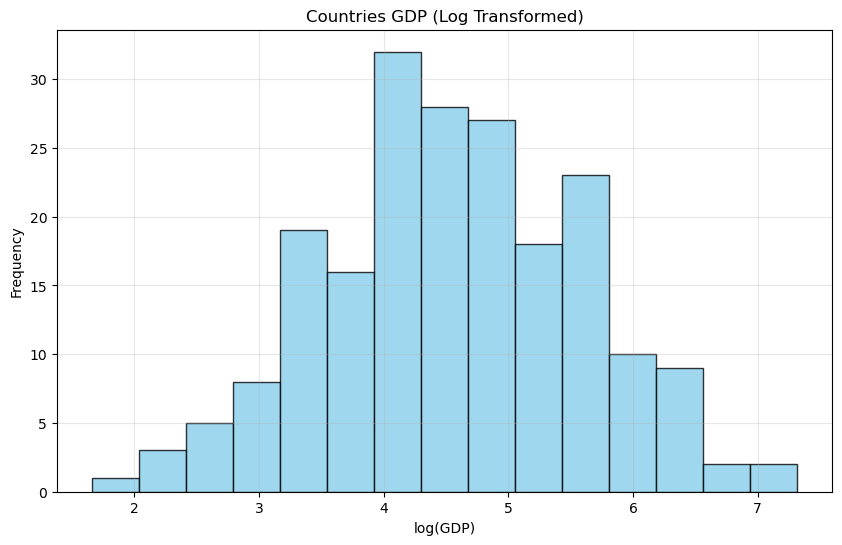

In [127]:
plot_gdp_hist()

In [128]:
df = df[['log_gdp', 'log_pop', 'life_exp', 'co2_emissions',
       'internet_users', 'tourists', 'fertility', 'sec_sch_fem']]

In [129]:
df.describe()

,log_gdp,log_pop,life_exp,co2_emissions,internet_users,tourists,fertility,sec_sch_fem
count,203.000000,204.000000,198.000000,145.000000,202.000000,194.000000,199.000000,190.000000
mean,4.570659,3.784603,72.233838,224.635862,54.716337,8010.876289,2.738693,83.920526
std,1.036563,1.005484,7.561445,888.950414,28.778218,15560.717753,1.285451,31.034407
min,1.662758,0.000000,52.700000,0.600000,0.000000,3.000000,1.100000,3.700000
25%,3.911147,3.318481,66.825000,8.700000,28.175000,369.000000,1.800000,57.275000
50%,4.536887,3.964959,73.525000,31.300000,58.950000,1917.500000,2.300000,91.600000
75%,5.363108,4.498712,77.250000,130.500000,79.575000,7403.750000,3.600000,103.400000
max,7.313450,6.158159,84.400000,9257.900000,99.700000,89322.000000,7.000000,167.800000


In [130]:
df.corr()

,log_gdp,log_pop,life_exp,co2_emissions,internet_users,tourists,fertility,sec_sch_fem
log_gdp,1.000000,0.796764,0.467744,0.477907,0.455993,0.626758,-0.399988,0.351032
log_pop,0.796764,1.000000,-0.036058,0.445324,-0.110055,0.426198,0.076495,-0.137617
life_exp,0.467744,-0.036058,1.000000,0.099324,0.818588,0.409530,-0.847321,0.805858
co2_emissions,0.477907,0.445324,0.099324,1.000000,0.070124,0.467510,-0.126531,0.052336
internet_users,0.455993,-0.110055,0.818588,0.070124,1.000000,0.355169,-0.799667,0.771496
tourists,0.626758,0.426198,0.409530,0.467510,0.355169,1.000000,-0.346856,0.299351
fertility,-0.399988,0.076495,-0.847321,-0.126531,-0.799667,-0.346856,1.000000,-0.811459
sec_sch_fem,0.351032,-0.137617,0.805858,0.052336,0.771496,0.299351,-0.811459,1.000000


HeatMap


In [131]:
def plot_heatmap():
    """
    Creates a Heatmap across selected variables
    """
    
    fig, ax = plt.subplots()
    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    
    plt.title('Heatmap showing correlation of Developmenatal Indicators', pad = 20)
    plt.show()
    return 

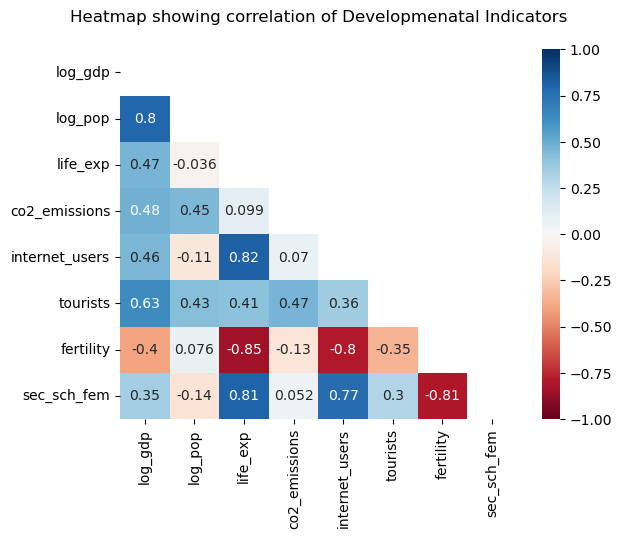

In [132]:
plot_heatmap()

Fitting

In [133]:
def plot_scatter():
    
    plt.scatter('log_pop', 'log_gdp', data = df)
    
    plt.show()
    
    return

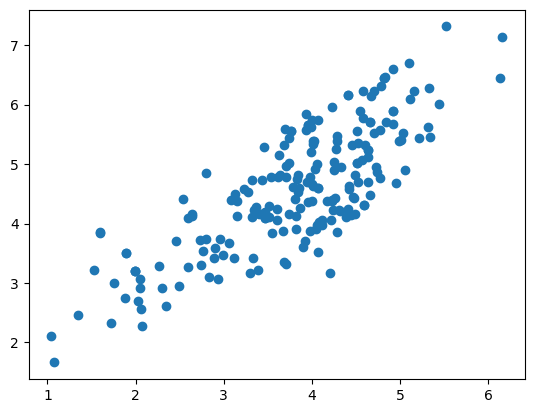

In [134]:
plot_scatter()

In [135]:
from sklearn.linear_model import LinearRegression


In [136]:
def lin_reg():
    """
    Creates a Linear regression between Log GDP and Log Population
    
    """
    
    
    
    df2 = df[['log_gdp', 'log_pop']].dropna().copy()

    # Convert to numpy arrays
    X = np.array(df2['log_gdp']).reshape(-1, 1)  
    y = np.array(df2['log_pop'])       

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get the regression line
    y_pred = model.predict(X)


    # Plot the data and regression line
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Countries')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Log(Population)')
    plt.ylabel('Log(GDP)')
    plt.title('Log Population vs Log GDP')
    plt.legend()
    plt.show()
    
    print(f"Slope (m): {model.coef_[0]}")
    print(f"Intercept (b): {model.intercept_}")
    print(f"Equation: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")
    
    return


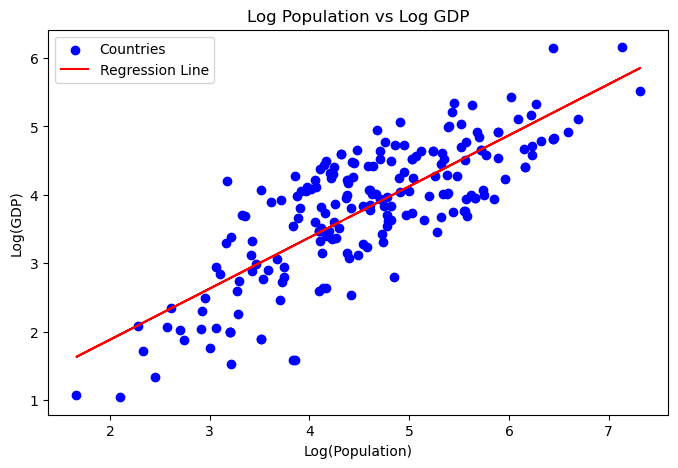

Slope (m): 0.747123006483046
Intercept (b): 0.3884023836134505
Equation: y = 0.75 * x + 0.39


In [137]:
lin_reg()

Clustering


In [138]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [139]:
from sklearn.preprocessing import StandardScaler
df_clust = df[['log_gdp', 'life_exp']].dropna().copy()
scaler = StandardScaler()
norm = scaler.fit_transform(df_clust)

In [140]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [141]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(1, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

In [ ]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

In [104]:
from matplotlib.colors import ListedColormap

In [105]:
def plot_fitted_lifeexp_GDP(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data')

    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('GDP')
    ax.set_ylabel('Life Expectancy')
    ax.set_title('Clustered Groups of GDP and Life Expectancy')
    plt.show()
    return

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


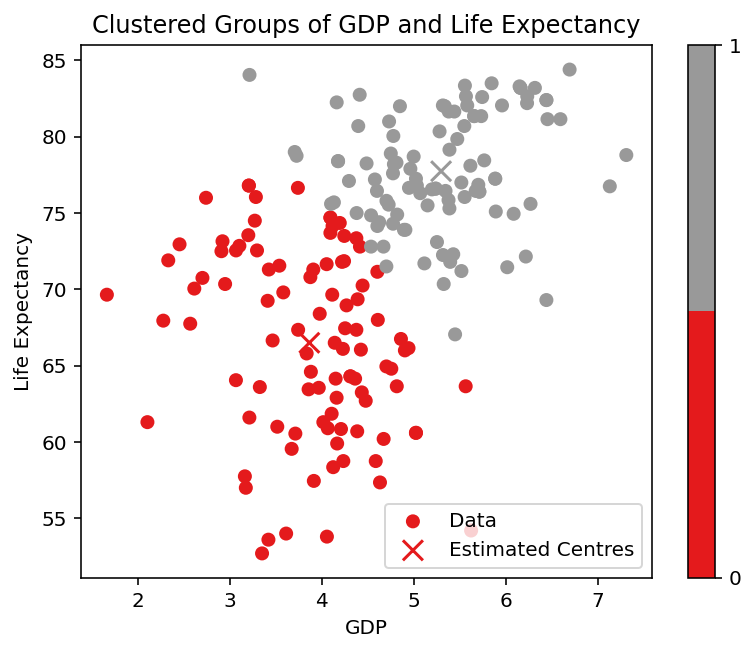

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


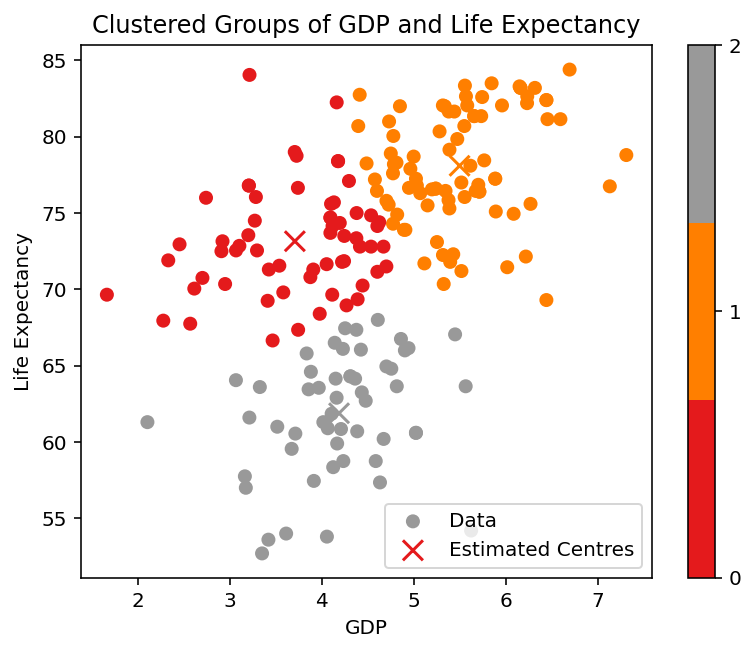

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


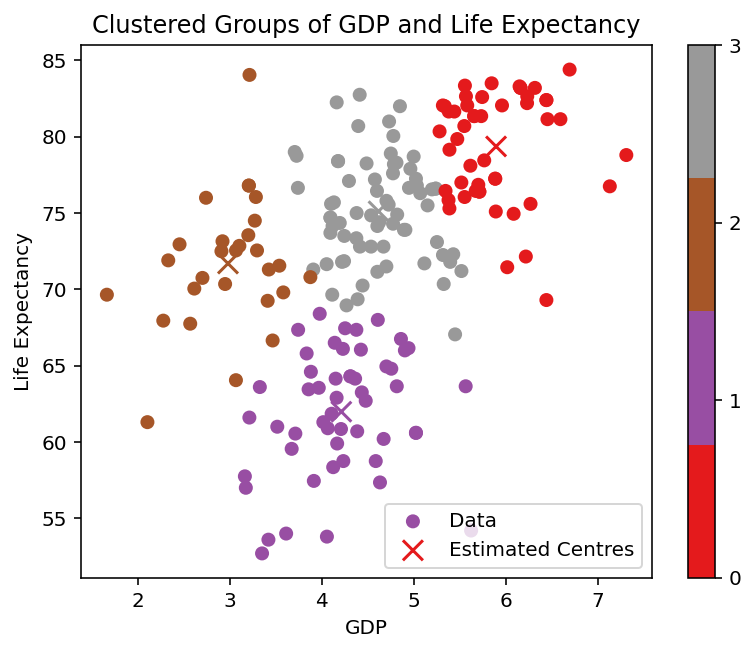

In [109]:
# Undo the transformation
inv_norm = scaler.inverse_transform(norm)  # this is important for plotting data accurately

# plot for 2 to 4 clusters
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_lifeexp_GDP(labels, inv_norm, xkmeans, ykmeans, cenlabels)

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


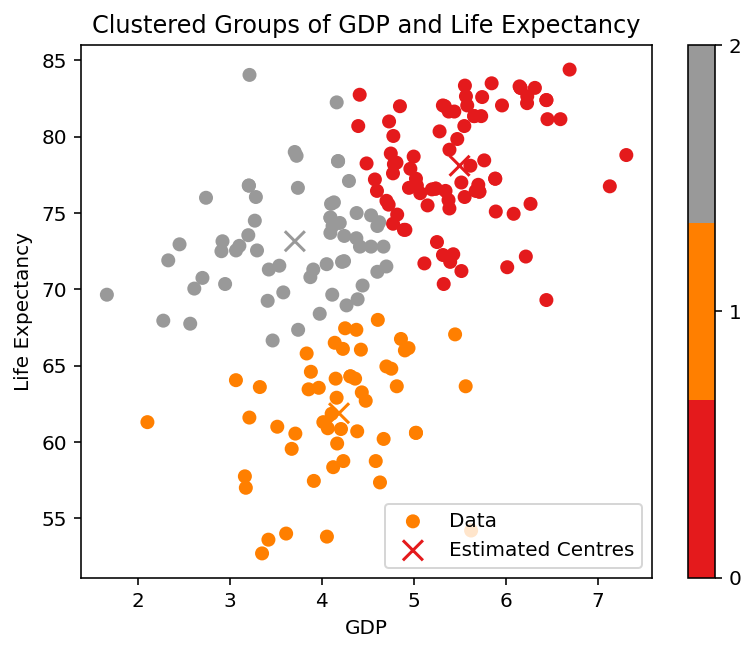

In [110]:
# Cluster for 3 clusters
k = 3
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(norm)     # fit done on x,y pairs
labels = kmeans.labels_
    
# plot the estimated cluster centres
cen = scaler.inverse_transform(kmeans.cluster_centers_)
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]
cenlabels = kmeans.predict(kmeans.cluster_centers_)
plot_fitted_lifeexp_GDP(labels, inv_norm, xkmeans, ykmeans, cenlabels)

In [111]:
print(cen)

[[ 5.49964382 78.09642857]
 [ 4.18850157 61.88396226]
 [ 3.707686   73.15327869]]


In [112]:
10 ** 5.49964382

315968.5229560029

In [113]:
10 ** 4.18850157

15434.820030923283

In [114]:
10 ** 3.707686

5101.360322777713